In [7]:
library(benchmarkme)
get_platform_info()$OS.type
get_r_version()$version.string
get_cpu()$model_name;get_cpu()$no_of_cores
get_ram()

[1] "windows"

[1] "R version 3.5.1 (2018-07-02)"

[1] "Intel(R) Core(TM) i7-7700HQ CPU @ 2.80GHz"

[1] 8

8.59 GB

In [8]:
# Loading data
geno <-read.table("./Hetero_realigned_cov10_filtered3.raw", 
                  row.names=1, header=T)
row.names(geno)=1:240

## Number of SNPs for each chromosome

In [9]:
# Position data
lin_map<-read.table("raw.map")
m<-1:22; chr<-1:22
for(i in chr) {m[i]=dim(lin_map[lin_map$V1==i,])[1]}
data<-data.frame(SNP=m,chr=chr)
sum(data$SNP) # total SNPs 

[1] 3928

png 
  2

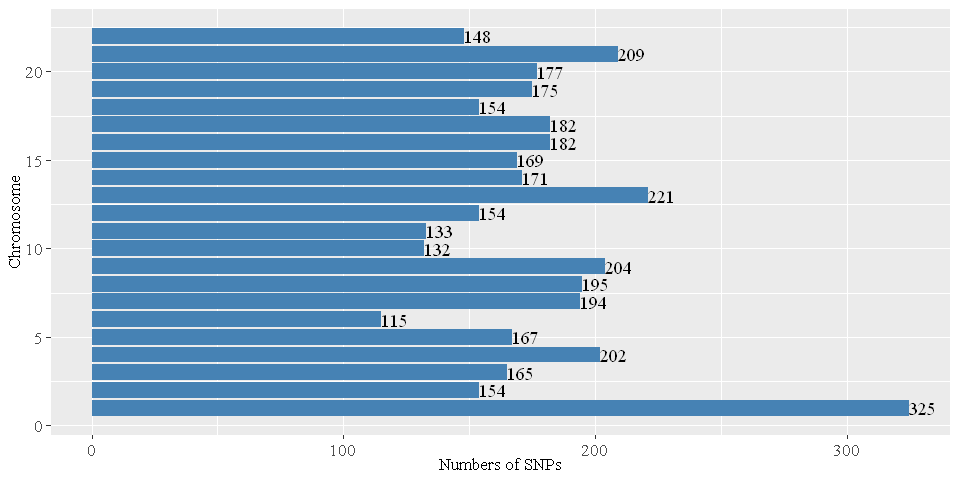

In [10]:
# Plot
library("extrafont")
library(ggplot2)
options(repr.plot.width=8, repr.plot.height=4)
p<-ggplot(data=data, aes(x=chr, y=SNP))+
  geom_bar(stat="identity", fill="steelblue")+
  geom_text(aes(label=SNP), hjust = 0, color ="black",
            family="serif", size=4)+
  labs(x="Chromosome", y="Numbers of SNPs")+
  theme(axis.text.y=element_text(size=10),
        axis.text.x=element_text(size=10),
        text=element_text(size=10, 
        family="serif"))+
  coord_flip()
png("Marker_distrbution.png", width=8, height=4, units="in", res=300)
# Horizontal bar plot
plot(p)
dev.off()
p

## Observed Heterozigosity

In [13]:
# Function for calculation of heterozigosity
hetero_loci<-function(geno){
   n<-list()
   for (i in 1:length(geno)){
   m<-(data.frame(table(geno[,i])))    
   n[i]<-m[m[,1]==1,][1,2]/240
       }
    return(n)
    }

In [14]:
i<-hetero_loci(geno)
summary(as.numeric(i))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.008333 0.554167 0.779167 0.705820 0.908333 1.000000 

In [18]:
sum(geno==1)/(3928*240)

[1] 0.7058204

## Simulator

In [19]:
# Original xbreed
# library("devtools")
# install_github("cran/xbreed")
library("xbreed")

("|-----------------------------------------------------|")
("|                      xbreed                         |")
("|    Genomic simulation of purebreds and crossbreds   |")
("|               March 2017 Version 1.0.1              |")
("|                                                     |")
("|             H.Esfandyari,A.C.Sorensen               |")
("| Center for Quantitative Qenetics and Genomics (QGG) |")
("|             Aarhus University,Denmark               |")
("|                                                     |")
("|-----------------------------------------------------|")
("|Questions and bugs: esfandyari.hadi@gmail.com        |")
("|Development of xbreed was supported by GenSAP.       |")
("|-----------------------------------------------------|")


## Genome specification

In [21]:
#parameter of genome
genome<-data.frame(matrix(NA, nrow=22, ncol=6))
names(genome)<-c("chr","len","nmrk","mpos","nqtl","qpos")
genome$chr<-c(1:22) # Chromosome id from 1 to 22
genome$len<-c(200,rep(100,21))# Chromosome length in cM
genome$nmrk<-c(m) # Number of markers per chr, 3928 in total 
genome$mpos<-c('even') # Markers are evenly spaced
genome$nqtl<-c(40) # Number of qtl  40*22 = 880 in total
genome$qpos<-c('rnd') # Position of QTL are random.

## Build the historical (wild) population

In [22]:
#Historical population 
hp<-make_hp(hpsize=1000 ,ng=5000,h2=0.654,d2=0,phen_var=84,
            genome=genome,mutr=2.5*10**-4,laf=1)

---sel_seq_qtl is missing, it has been set to default value of 0
---sel_seq_mrk is missing, it has been set to default value of 0
Historical pop is initialized...
Simulating trait ...
Output data preparation ...
Establishment of historical population completed


In [24]:
# Expected Heterozygosity according to (Kimura and Crow 1964) 
mutr<-2.5*10**-4
ne<-1000 
k<-2 
Fneu<-4*ne*mutr 
(Expected_het1<-Fneu/(1+Fneu))
(Expected_het2<-1-((1+((Fneu)/(k-1)))/(1+((Fneu*k)/(k-1)))))

[1] 0.5

[1] 0.3333333

In [26]:
(het_observed<-mean(2*(hp$freqMrk[,3]*hp$freqMrk[,4])))

[1] 0.3971104

In [27]:
mat<-hp$hp_mrk[,-1] 
LD<-calc_LD(mat=mat,MAF=0.1,method='adjacent',LD_summary=TRUE)
LD$Mean_r2


 ****  Linkage disequilibrium output ****  

Method: adjacent
No. marker: 3708
No. marker pairs: 3707

 "D" summary:
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.1142010 -0.0188989 -0.0004642 -0.0002743  0.0187635  0.1217925 

 "r" summary:
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.469684 -0.095011 -0.002525 -0.001577  0.092559  0.531347 

 "r2" summary:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.001914 0.008878 0.019204 0.025147 0.282329 


[1] 0.01920413